# Projet d'informatique


### Leo RENE et Arman Akgonul

In [34]:
import math
import unittest
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
import networkx as nx
import pandas as pd
import time


On représente nos graphes par un doublet (liste des sommets,arcs)

In [35]:
def ACPM(graphe):
    parent=dict() #on fait des dictionnaires pour que nos sommets puissent avoir n'importe quel type
    importance=dict() #
    arbre=[]
    sommets,arcs=graphe
    for i in range (len(sommets)): #on initilaise les parents et les profondeurs
        parent[sommets[i]]=sommets[i]
        importance[sommets[i]]=0
    arcs.sort()
    for i in range (len(arcs)):
        poids,sommet1,sommet2=arcs[i]
        def racine (a):
            if parent[a]!=a:
                return(racine(parent[a]))
            return(a)
        if racine(sommet1)!=racine(sommet2): #on vérifie qu'on ne crée pas de boucles dans l'arbre
            def union(a,b):
                racine1=racine(sommet1)
                racine2=racine(sommet2)
                if importance[racine1]>importance[racine2]: #On va lses relier sur le sommet le plus important
                    parent[racine2]=racine1 #On relie les deux composantes connexes en leur mettant la même racine
                else:
                    parent[racine1]=racine2
                if importance[racine1]==importance[racine2]: #on choisit arbitrairement un des deux que l'on met plus important
                    importance[racine2]=importance[racine2]+1
            union(sommet1,sommet2)
            arbre.append(arcs[i])
    return(sommets,arbre,parent,importance)

print(ACPM((['a','b','c','d'],[(12,'a','d'),(1,'a','b'),(14,'b','d'),(2,'a','c'),(3,'b','c'),(6,'c','d')])))

(['a', 'b', 'c', 'd'], [(1, 'a', 'b'), (2, 'a', 'c'), (6, 'c', 'd')], {'a': 'b', 'b': 'b', 'c': 'b', 'd': 'b'}, {'a': 0, 'b': 1, 'c': 0, 'd': 0})


U=[X1,...,Xn] représente l'ensemble des variables et D la database.

On se cantonne à des variables discrètes

In [36]:
def ACPM2(graphe): #Celui là veut renvoyer le chemin maximal
    parent=dict() #on fait des dictionnaires pour que nos sommets puissent avoir n'importe quel type
    importance=dict() #
    arbre=[]
    sommets,arcs=graphe
    for i in range (len(sommets)): #on initilaise les parents et les profondeurs
        parent[sommets[i]]=sommets[i]
        importance[sommets[i]]=0
    arcs.sort(reverse=True) #on inverse le sens de tri
    for i in range (len(arcs)):
        poids,sommet1,sommet2=arcs[i]
        def racine (a):
            if parent[a]!=a:
                return(racine(parent[a]))
            return(a)
        if racine(sommet1)!=racine(sommet2): #on vérifie qu'on ne crée pas de boucles dans l'arbre
            def union(a,b):
                racine1=racine(sommet1)
                racine2=racine(sommet2)
                if importance[racine1]>importance[racine2]: #On va lses relier sur le sommet le plus important
                    parent[racine2]=racine1 #On relie les deux composantes connexes en leur mettant la même racine
                else:
                    parent[racine1]=racine2
                if importance[racine1]==importance[racine2]: #on choisit arbitrairement un des deux que l'on met plus important
                    importance[racine2]=importance[racine2]+1
            union(sommet1,sommet2)
            arbre.append((sommet1,sommet2))
    arbre.sort()
    return(arbre)

def Chowliu(U,D): #On va vouloir créer un graphe pour lui appliquer l'ACMP2
    n=len(U)
    m=len(D)
    prob=dict() #ce qui va regrouper mes probas approchées des couples (Xi,Xj) ou Xi
    for i in range (n):
        for j in range (i+1):
            if i!=j:
                prob1=dict()
                for h in range (m): #les probas des différentes valeurs du couple (Xi,Xj)
                    if ((D[h][i],D[h][j]) in prob1):
                        prob1[(D[h][i],D[h][j])]=prob1[(D[h][i],D[h][j])]+1/m
                    else:
                        prob1[(D[h][i],D[h][j])]=1/m
                prob[(U[i],U[j])]=prob1
            else:
                prob1=dict() #les probas des différentes valeurs de Xi
                for h in range (m):
                    if (D[h][i] in prob1):
                        prob1[D[h][i]]=prob1[D[h][i]]+1/m
                    else:
                        prob1[D[h][i]]=1/m
                prob[U[i]]=prob1
    L=[] #ce qui va regrouper mes arcs du graphe
    for i in range (n):# on calcule l'information mutuelle de toutes les variables
        for j in range (i+1):
            if i!=j:
                M=0
                for k in (prob[U[i]]):
                    for l in (prob[U[j]]):
                        if ((k,l) in prob[(U[i],U[j])]):
                            M=M+prob[(U[i],U[j])][(k,l)]*math.log10(prob[(U[i],U[j])][(k,l)]/(prob[U[i]][k]*prob[U[j]][l])) #application de la formule d'information mutuelle
                L.append((M,U[i],U[j]))
    return(ACPM2((U,L)))

### Algorithme de dessin du graphe

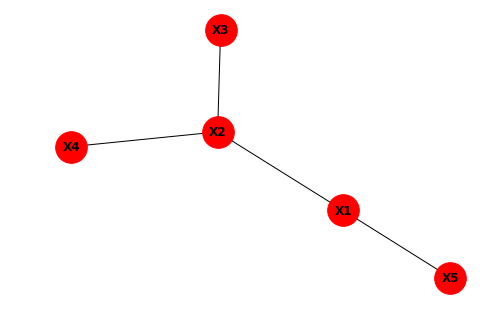

In [37]:
def dessin(U,D):
    T=Chowliu(U,D)
    G=nx.Graph(day="Friday")
    for i in range (len(T)):
        a,b=T[i]
        G.add_node(a)
        G.add_node(b)
        G.add_edge(a,b)
    nx.draw(G,with_labels=True,font_weight='bold', node_size=1000)
    
D=[]
for i in range (6000):
    x1=randint(1,2)
    x2=x1+randint(1,2)
    x3=x2+randint(1,2)
    x4=randint(1,4)+x2
    x5=x1+randint(1,7)
    D.append([x1,x2,x3,x4,x5])

dessin(['X1','X2','X3','X4','X5'],D)

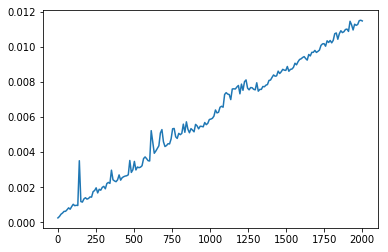

In [73]:
L=[]
for i in range (1,201):
    D=[]
    for i in range (10*i):
        x1=randint(1,2)
        x2=x1+randint(1,2)
        x3=x2+randint(1,2)
        x4=randint(1,4)+x2
        x5=x1+randint(1,7)
        D.append([x1,x2,x3,x4,x5])
    start_time = time.time()
    a=Chowliu(['X1','X2','X3','X4','X5'],D)
    L.append(time.time() - start_time)
    
x=np.linspace(0,2000, 200)
plt.plot(x,L)
plt.show()

# Création d'un jeu de données synthétique

Ici, P(X1,X2,X3,X4,X5)=P(X1)P(X2|X1)P(X3|X2)P(X4|X2)P(X5|X1)

In [69]:
D=[]
for i in range (13000):
    x1=randint(1,2)
    x2=x1+randint(1,2)
    x3=x2+randint(1,2)
    x4=randint(1,4)+x2
    x5=x1+randint(1,7)
    D.append([x1,x2,x3,x4,x5])


class TestChowLiu(unittest.TestCase):
    def test_classique(self):
        V=Chowliu(['X1','X2','X3','X4','X5'],D)
        self.assertEqual([('X2', 'X1'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1')],V)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.085s

OK


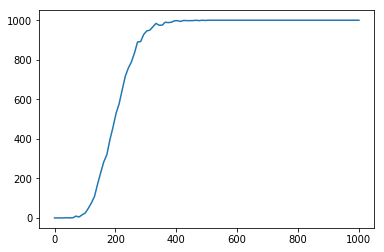

In [45]:
def f(h):
    m=0
    for j in range (1000):
        D=[]
        for i in range (h):
            x1=randint(1,2)
            x2=x1+randint(1,2)
            x3=x2+randint(1,2)
            x4=randint(1,4)+x2
            x5=x1+randint(1,7)
            D.append([x1,x2,x3,x4,x5])
        if Chowliu(['X1','X2','X3','X4','X5'],D)==[('X2', 'X1'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1')]:
            m=m+1
    return(m)

x=np.linspace(0,1000, 100)
y=[f(10*i) for i in range (100)]
plt.plot(x, y)
plt.show()

#### Tentative avec des gaussiennes

Ici, P(X1,X2,X3,X4,X5)=P(X1)P(X2|X1)P(X3|X2)P(X4|X2)P(X5|X1)

In [70]:
D=[]
for i in range (6000):
    x1=gauss(10,15)
    x2=x1+gauss(10,20)
    x3=x2+gauss(100,15)
    x4=x2+gauss(0,4)
    x5=x1+gauss(0,2)
    D.append([x1,x2,x3,x4,x5])
    
class TestChowLiu(unittest.TestCase):
    def test_classique(self):
        V=Chowliu(['X1','X2','X3','X4','X5'],D)
        self.assertEqual([('X2', 'X1'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1')],V)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)    

F
FAIL: test_classique (__main__.TestChowLiu)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-70-7a621e52bafd>", line 18, in test_classique
    self.assertEqual([('X2', 'X1'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1')],V)
AssertionError: Lists differ: [('X2', 'X1'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1')] != [('X5', 'X1'), ('X5', 'X2'), ('X5', 'X3'), ('X5', 'X4')]

First differing element 0:
('X2', 'X1')
('X5', 'X1')

- [('X2', 'X1'), ('X3', 'X2'), ('X4', 'X2'), ('X5', 'X1')]
+ [('X5', 'X1'), ('X5', 'X2'), ('X5', 'X3'), ('X5', 'X4')]

----------------------------------------------------------------------
Ran 1 test in 69.489s

FAILED (failures=1)


## Tentative de clustering: K-means

In [75]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

On importe le dataset et on le visualise (disponible ici: https://www.kaggle.com/karangadiya/fifa19 )

In [77]:
D = pd.read_csv('/Users/guillaume/Downloads/data.csv')
print(D.shape)
D.head(8)

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M


### 1. Affichage des données

On affiche tout d'abord les distributions pour voir si le k-means se justifie. On peut voir sur 'Age' et 'Overall' que cela peut être cohérent. Cependant sur d'autres variables une régression linéaire aurait été plus judicieuse. (cf.rapport)

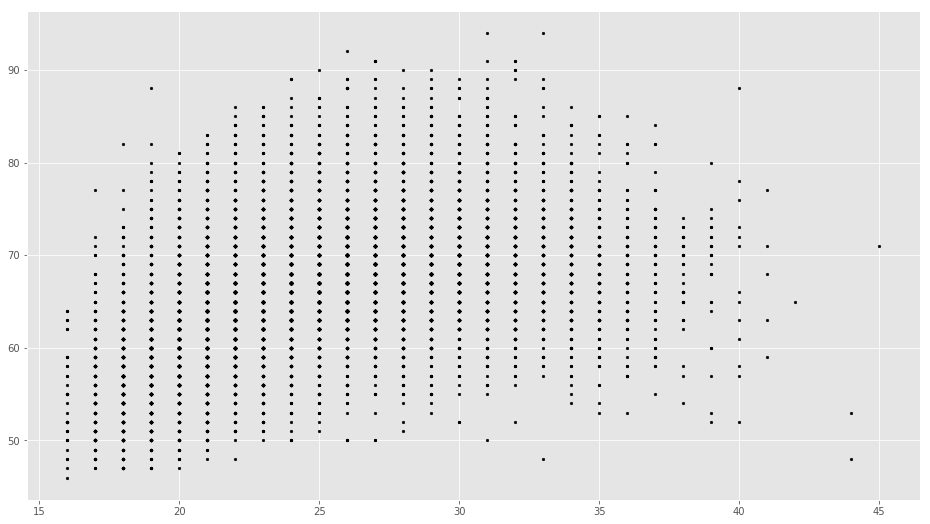

In [78]:
f1 = D['Age'].values
f2 = D['Overall'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Algorithme de norme euclidienne pour calculer les distances aux centroïdes ultérieurement.

In [ ]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
#nb de clusters
k = 3
# X coordonnées aléatoire des centroïdes
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordonnées aléatoires des centroïdes
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

In [ ]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

### 2. Implémentation du k-means

In [ ]:
#Garde la valeur des centroïdes quand ils ont actualisés
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
#Fonction d'erreur qui représente la distance entre les anciens et les nouveaux centroïdes
error = dist(C, C_old, None)
while error != 0:
    #On associe chaque valeur au cluster le plus proche
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    #On trouve les nouveaux
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Analyse de la base de données 
### 1. Première visualisation
On cherche ici à visualiser une première fois la base et à savoir combien elle comporte de ligne et de colonnes.

In [10]:
D = pd.read_csv('/Users/guillaume/Downloads/data.csv',index_col=False)
print(D.shape)
D.head(5)

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [11]:
D.iloc[122]

Unnamed: 0                                                             122
ID                                                                  204970
Name                                                            F. Thauvin
Age                                                                     25
Photo                       https://cdn.sofifa.org/players/4/19/204970.png
Nationality                                                         France
Flag                                   https://cdn.sofifa.org/flags/18.png
Overall                                                                 84
Potential                                                               87
Club                                                Olympique de Marseille
Club Logo                     https://cdn.sofifa.org/teams/2/light/219.png
Value                                                                 €39M
Wage                                                                  €72K
Special                  

### 2. Conditions d'application

Une condition d'application de l'algorithme est que les colonnes n'aient pas d'observations manquantes. Ainsi on écrit un test pour vérifier si une case du data frame est vide.

In [12]:
D_1=D[["Overall","Wage","Contract Valid Until","Potential","Age","International Reputation","Value","Skill Moves","Work Rate","Weak Foot"]]
D_1

,Overall,Wage,Contract Valid Until,Potential,Age,International Reputation,Value,Skill Moves,Work Rate,Weak Foot
0,94,€565K,2021,94,31,5.0,€110.5M,4.0,Medium/ Medium,4.0
1,94,€405K,2022,94,33,5.0,€77M,5.0,High/ Low,4.0
2,92,€290K,2022,93,26,5.0,€118.5M,5.0,High/ Medium,5.0
3,91,€260K,2020,93,27,4.0,€72M,1.0,Medium/ Medium,3.0
4,91,€355K,2023,92,27,4.0,€102M,4.0,High/ High,5.0
5,91,€340K,2020,91,27,4.0,€93M,4.0,High/ Medium,4.0
6,91,€420K,2020,91,32,4.0,€67M,4.0,High/ High,4.0
7,91,€455K,2021,91,31,5.0,€80M,3.0,High/ Medium,4.0
8,91,€380K,2020,91,32,4.0,€51M,3.0,High/ Medium,3.0
9,90,€94K,2021,93,25,3.0,€68M,1.0,Medium/ Medium,3.0


In [13]:
print(D_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 10 columns):
Overall                     18207 non-null int64
Wage                        18207 non-null object
Contract Valid Until        17918 non-null object
Potential                   18207 non-null int64
Age                         18207 non-null int64
International Reputation    18159 non-null float64
Value                       18207 non-null object
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Weak Foot                   18159 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.4+ MB
None


### 3. Distribution des données 

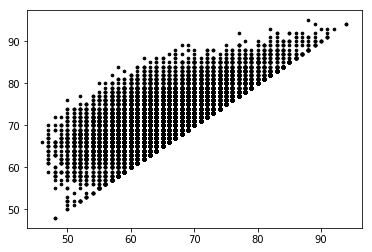

In [14]:
f1 = D['Overall'].values
f2 = D['Potential'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

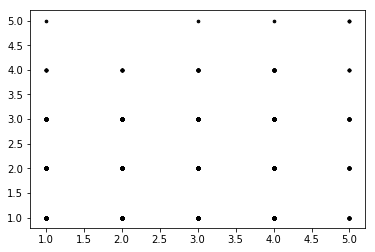

In [15]:
f1 = D['Skill Moves'].values
f2 = D['International Reputation'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

On a affiché ici la distribution de deux variables 'Potential' et 'Overall'. on observe que les données sont distribuées a peu près linéairement et que des valeurs extrêmes existent (en bas à gauche et en haut à droite). Ainsi le k-means n'est pas pleinement justifié. En fait les valeurs extrêmes vont lui nuire (overfitting) et la distribution utilisée suffit.

## Traitement de cette base de donnée 

In [40]:
df=pd.read_csv('/Users/guillaume/Downloads/data.csv',index_col=False)
Age=np.asarray(df.Age)
Overall=np.asarray(df.Overall)
Potential=np.asarray(df.Potential)
Value1=np.asarray(df.Value)
Wage1=np.asarray(df.Wage)
International=np.asarray(df["International Reputation"])
Work=np.asarray(df["Work Rate"])
Skill=np.asarray(df["Skill Moves"])
Weak=np.asarray(df["Weak Foot"])
Contract=np.asarray(df["Contract Valid Until"])
Data1=np.transpose(np.asarray([Age,Potential,Wage1,International,Work,Skill,Weak,Contract]))
U=["Age","Potential","Wage","International Reputation","Work Rate","Skill Moves","Weak Foot","Contract Valid Until"]

In [24]:
print(Chowliu(U,Data1))

[('Contract Valid Until', 'Value'), ('International Reputation', 'Overall'), ('Skill Moves', 'Value'), ('Skill Moves', 'Work Rate'), ('Value', 'Age'), ('Value', 'Overall'), ('Value', 'Potential'), ('Wage', 'Value'), ('Weak Foot', 'Skill Moves')]


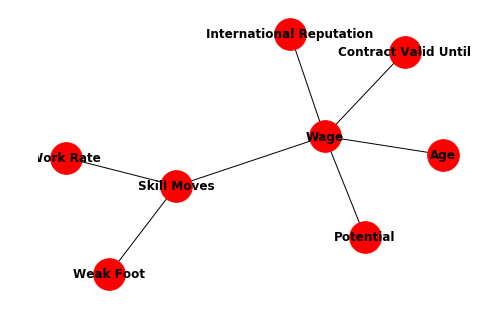

In [41]:
dessin(U,Data1)

Maintenant en segmentarisant la valeur et le salaire en dizaines

In [90]:
p=0
q=0
lv=[]
lw=[]
for i in range (len(Data1)):
    if not(Data1[i][3] in lv):
        lv.append(Data1[i][3])
        p+=1
    if not(Data1[i][4] in lw):
        lw.append(Data1[i][4])
        q+=1
print(p,q)

217 144


In [39]:
Value1=np.asarray(df.Value)
Wage1=np.asarray(df.Wage)
Value=[]
Wage=[]

for i in range (len(Value1)):#on transforme notre chaine de caractère en entier
    if len(Value1[i])<4:
        Value.append(int(Value1[i][1]))
    elif len(Value1[i])==7:
        if Value1[i][6]=='M':
            Value.append(int(Value1[i][1:3])*10000)
        elif Value1[i][6]=='K':
            Value.append(int(Value1[i][1:3])*10)
    elif Value1[i][3]=='.':
        if Value1[i][5]=='M':
            Value.append(int(Value1[i][1])*10000)
        elif Value1[i][5]=='K':
            Value.append(int(Value1[i][1])*10)
    elif  Value1[i][2]=='.':
        if Value1[i][4]=='M':
            Value.append(int(Value1[i][1])*1000)
        elif Value1[i][4]=='K':
            Value.append(int(Value1[i][1]))
    else:
        if Value1[i][3]=='M':
            Value.append(int(Value1[i][1])*10000)
        elif Value1[i][3]=='K':
            Value.append(int(Value1[i][1])*10)
        elif Value1[i][2]=='M':
            Value.append(int(Value1[i][1])*1000)
        elif Value1[i][2]=='K':
            Value.append(int(Value1[i][1]))
            
for i in range (len(Wage1)):
    if len(Wage1[i])==3:
        Wage.append(int(Wage1[i][1]))
    elif len(Wage1[i])==4:
        Wage.append(int(Wage1[i][1])*10)
    elif len(Wage1[i])==5:
        Wage.append(int(Wage1[i][1:3])*10)
        

Value2=np.asarray(Value)
Wage2=np.asarray(Wage)

Data2=np.transpose(np.asarray([Age,Overall,Potential,Value2,Wage2,International,Work,Skill,Weak,Contract]))

In [91]:
p=0
q=0
lv=[]
lw=[]
for i in range (len(Data2)):
    if not(Data2[i][3] in lv):
        lv.append(Data2[i][3])
        p+=1
    if not(Data2[i][4] in lw):
        lw.append(Data2[i][4])
        q+=1
print(p,q)

10 9


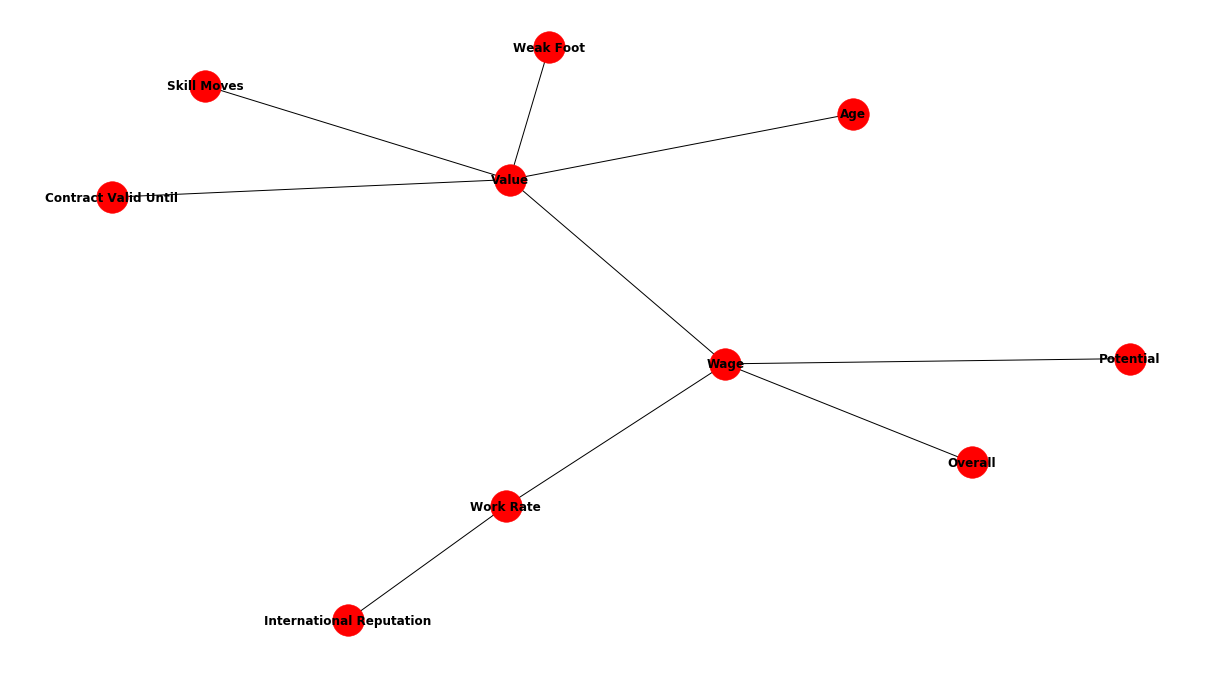

In [87]:
dessin(U,Data2)